In [5]:
import os

# DATAPATH
directory_path = "./archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# LIST ALL FILE IN THE DIRECTORY
files = os.listdir(directory_path)


print(files)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [19]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # or use 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt'

# Train the model
model.train(
    data='disease.yaml',  # Path to your dataset YAML file
    epochs=50,                         # Number of epochs
    batch=16,                          # Batch size
    imgsz=640,                         # Image size (YOLOv8 standard is 640)
    project='plant_disease_project',    # Project name
    name='yolov8_finetuned',            # Run name
    exist_ok=True                       # Overwrite existing project
)


New https://pypi.org/project/ultralytics/8.2.75 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.206  Python-3.11.6 torch-2.1.0+cpu CPU (11th Gen Intel Core(TM) i5-11320H 3.20GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=disease.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=plant_disease_project, name=yolov8_finetuned, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visual

KeyboardInterrupt: 

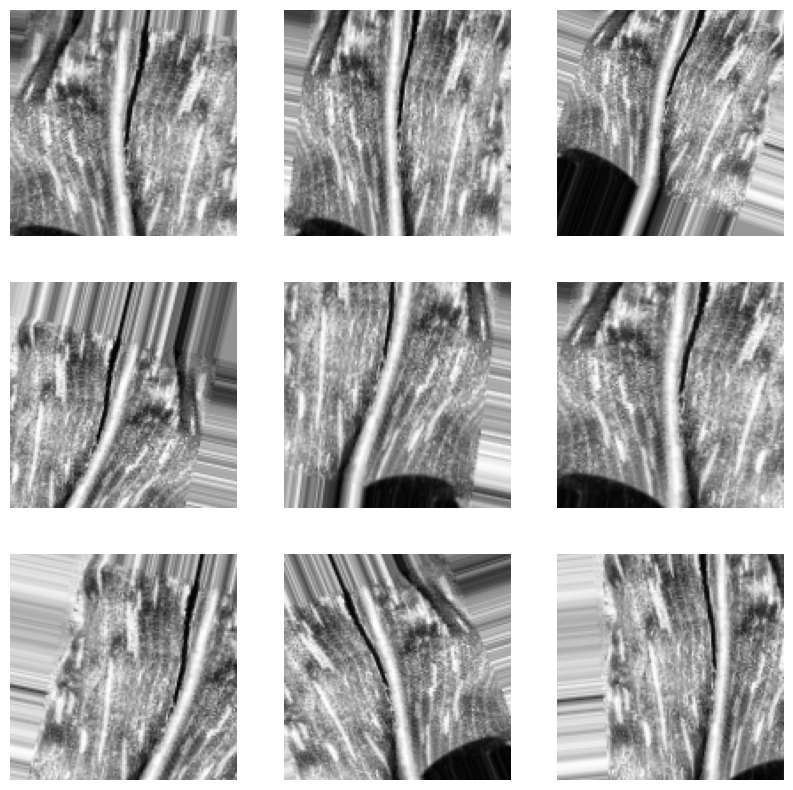

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)

                    # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
                    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
                    img = clahe.apply(img)

                    images.append(img)
                    labels.append(label)
            except cv2.error as e:
                pass  # Skip the image

    return images, labels

categories = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


all_images = []
all_labels = []


for category in categories:
   
    category_path = os.path.join("./archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", category)

   
    images, labels = load_and_preprocess_images(category_path, label=category)

 
    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)


if len(all_images.shape) == 3:
    all_images = np.expand_dims(all_images, axis=-1)


label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)


all_labels_one_hot = to_categorical(all_labels_numeric)


all_images_normalized = all_images / 255.0


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = datagen.random_transform(all_images_normalized[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.axis('off')

plt.show()

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, image_size)

                    # Apply CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
                    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
                    img = clahe.apply(img)

                    images.append(img)
                    labels.append(label)
            except cv2.error as e:
                pass  # Skip the image

    return images, labels

categories = ['train/Apple___Apple_scab','train/Apple___Black_rot',
'train/Apple___Cedar_apple_rust',
'train/Apple___healthy',
'train/Blueberry___healthy',
'train/Cherry_(including_sour)___healthy',
'train/Cherry_(including_sour)___Powdery_mildew',
'train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'train/Corn_(maize)___Common_rust_',
'train/Corn_(maize)___healthy',
'train/Corn_(maize)___Northern_Leaf_Blight',
'train/Grape___Black_rot',
'train/Grape___Esca_(Black_Measles)',
'train/Grape___healthy',
'train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
'train/Orange___Haunglongbing_(Citrus_greening)',
'train/Peach___Bacterial_spot',
'train/Peach___healthy',
'train/Pepper,_bell___Bacterial_spot',
'train/Pepper,_bell___healthy',
'train/Potato___Early_blight',
'train/Potato___healthy',
'train/Potato___Late_blight',
'train/Raspberry___healthy',
'train/Soybean___healthy',
'train/Squash___Powdery_mildew',
'train/Strawberry___healthy',
'train/Strawberry___Leaf_scorch',
'train/Tomato___Bacterial_spot',
'train/Tomato___Early_blight',
'train/Tomato___healthy',
'train/Tomato___Late_blight',
'train/Tomato___Leaf_Mold',
'train/Tomato___Septoria_leaf_spot',
'train/Tomato___Spider_mites Two-spotted_spider_mite',
'train/Tomato___Target_Spot',
'train/Tomato___Tomato_mosaic_virus',
'train/Tomato___Tomato_Yellow_Leaf_Curl_Virus']

all_images = []
all_labels = []


for category in categories:
   
    category_path = os.path.join("./archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)", category)

   
    images, labels = load_and_preprocess_images(category_path, label=category)

 
    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)


if len(all_images.shape) == 3:
    all_images = np.expand_dims(all_images, axis=-1)


label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)


all_labels_one_hot = to_categorical(all_labels_numeric)


all_images_normalized = all_images / 255.0


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(all_images_normalized, all_labels_one_hot, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1957, 128, 128, 1)
Shape of y_train: (1957, 8)
Shape of X_test: (490, 128, 128, 1)
Shape of y_test: (490, 8)


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
all_labels_numeric = label_encoder.fit_transform(all_labels)
num_classes = len(label_encoder.classes_)
all_labels_one_hot = to_categorical(all_labels_numeric, num_classes=num_classes)

# CNN MODEL
model = models.Sequential()

# CONVOLUTIONAL LAYERS
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# FULLY CONNECTED LAYERS
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# COMPILE THE MODEL
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# DISPLAY MODEL SUMMARY
model.summary()

# TRAIN MODEL
batch_size = 32
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(X_test, y_test))

# EVALUATE THE MODEL ON TEST SET
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# CONFUSION MATRIX AND CLASSIFICATION REPORT
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# PLOT CONFUSION MATRIX
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,752 (499.03 KB)

 Trainable params: 127,752 (499.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 283ms/step - accuracy: 0.6812 - loss: 1.2064 - val_accuracy: 0.8286 - val_loss: 0.5563
Epoch 2/30
14/62 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.7694 - loss: 0.7427

KeyboardInterrupt: 

In [ ]:
model.save("detection.h5", include_optimizer=True)

In [2]:
from tensorflow import keras
model = keras.models.load_model("detection.h5")

In [7]:
categories2=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
all_images=[]
all_labels=[]
for category in categories2:
   
    category_path = os.path.join("./archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", category)

   
    images, labels = load_and_preprocess_images(category_path, label=category)

 
    all_images.extend(images)
    all_labels.extend(labels)


all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.8, random_state=42)

In [9]:
print("X_test shape:", X_test.shape)

X_test shape: (480, 128, 128)


In [10]:
y_pred=model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Ensure y_test and y_pred are NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Convert predictions to class labels if they are probabilities
if y_pred.ndim == 2:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = y_pred

# Convert y_test to class labels if it is one-hot encoded
if y_test.ndim == 2:
    y_true_classes = np.argmax(y_test, axis=1)
else:
    y_true_classes = y_test

# Flatten arrays if they are multi-dimensional
y_true_classes = y_true_classes.flatten()
y_pred_classes = y_pred_classes.flatten()

# Create a unified set of labels
all_labels = np.unique(np.concatenate((y_true_classes, y_pred_classes)))
le = LabelEncoder()
le.fit(all_labels)

# Transform the labels
y_true_classes = le.transform(y_true_classes)
y_pred_classes = le.transform(y_pred_classes)

# Ensure data types are consistent
y_true_classes = y_true_classes.astype(int)
y_pred_classes = y_pred_classes.astype(int)

# Check shapes for consistency
print("y_true_classes shape:", y_true_classes.shape)
print("y_pred_classes shape:", y_pred_classes.shape)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


y_true_classes shape: (480,)
y_pred_classes shape: (480,)
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [ 39   2   3   0   0   0   0   0   0]
 [ 22  21   5   0   0   0   0   0   0]
 [ 14  20 323   0   0   0   0   0   0]
 [  2   0   3   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00      44.0
           4       0.00      0.00      0.00      48.0
           5       0.00      0.00      0.00     357.0
           6       0.00      0.00      0.00       5.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00      25.0

    ac

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [42]:
print(y_pred.shape)

(480, 8)


In [44]:
print(y_test)

['Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Squash___Powdery_mildew' 'Corn_(maize)___healthy'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy' 'Tomato___Late_blight'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Corn_(maize)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Tomato___Late_blight' 'Corn_(maize)___Northern_Leaf_Blight'
 'Tomato___Late_blight' 'Corn_(maize)___healthy'
 'Corn_(maize)___Northern_Leaf_Blight' 'Corn_(maize)___healthy'
 'Corn_(maize)___healthy' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Tomato___Late_blight' 'Corn_(maize)___healthy'
 'Corn_(maize)___healthy' 'Corn_(maize)___healthy'
 'Corn_(maize)__

In [19]:
print(y_test.shape)

(480,)


In [35]:
y_pred_classes = np.array(y_pred[:,0])
y_true_classes = np.array(y_test)

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Define your actual class names
class_names = y_test

# Convert y_pred to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test to numerical class indices
label_encoder = LabelEncoder()
label_encoder.fit(class_names)
y_test_encoded = label_encoder.transform(y_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred_classes))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_classes, target_names=class_names))


Confusion Matrix:
[[ 39   2   3   0   0   0]
 [ 22  21   5   0   0   0]
 [ 14  20 323   0   0   0]
 [  2   0   3   0   0   0]
 [  0   0   1   0   0   0]
 [ 25   0   0   0   0   0]]

Classification Report:


ValueError: Number of classes, 6, does not match size of target_names, 480. Try specifying the labels parameter

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2

# Define the path to your image
image_path = 'D:/project/virtualENV/HackOut 2024/archive/test/test/TomatoEarlyBlight1.JPG'

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Load image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or path is incorrect.")
    
    # Resize image
    img = cv2.resize(img, target_size)
    # Convert image to a NumPy array
    img_array = np.expand_dims(img, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array.astype('float32') / 255.0  # Normalize pixel values
    return img_array

# Load and preprocess the image
preprocessed_image = load_and_preprocess_image(image_path)

# Make a prediction
predictions = model.predict(preprocessed_image)

# Get the predicted class index
print(predictions)
predicted_class_index = np.argmax(predictions, axis=1)
print("Predicted class index:", predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Predicted class index: [2]


In [40]:
categories[2]

'train/Apple___Cedar_apple_rust'